In [21]:

from numpy.random import seed
seed(8)
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
%matplotlib inline


In [22]:

def read_in_and_split_data():
    
    iris_data = datasets.load_iris()
    data = iris_data["data"]
    targets = iris_data["target"]
    train_data, test_data, train_targets,test_targets = train_test_split(data, targets, test_size=0.1)
    return (train_data, test_data, train_targets,test_targets)
    

In [23]:
train_data, test_data, train_targets, test_targets = read_in_and_split_data()

In [24]:
train_targets = tf.keras.utils.to_categorical(np.array(train_targets))
test_targets = tf.keras.utils.to_categorical(np.array(test_targets))

In [25]:

def model(input_shape, dropout_rate, weight_decay):

    model = Sequential([
        Dense(64, activation="relu",
            kernel_regularizer=regularizers.l2(weight_decay),
            kernel_initializer="he_uniform",
            bias_initializer="ones",
            input_shape=input_shape),
        
        Dense(128,kernel_regularizer=regularizers.l2(weight_decay), activation="relu"),
        Dense(128,kernel_regularizer=regularizers.l2(weight_decay), activation="relu"),
        
        Dropout(dropout_rate),
        
        Dense(128,kernel_regularizer=regularizers.l2(weight_decay), activation="relu"),
        Dense(128,kernel_regularizer=regularizers.l2(weight_decay), activation="relu"),
        
        BatchNormalization(),
        
        Dense(64,kernel_regularizer=regularizers.l2(weight_decay), activation="relu"),
        Dense(64,kernel_regularizer=regularizers.l2(weight_decay), activation="relu"),
        
        Dropout(dropout_rate),
        
        Dense(64,kernel_regularizer=regularizers.l2(weight_decay), activation="relu"),
        Dense(64,kernel_regularizer=regularizers.l2(weight_decay), activation="relu"),
        Dense(3, activation="softmax"),
    ])
    
    return model


In [26]:
def callbacks():
    earlyStoping = tf.keras.callbacks.EarlyStopping(monitor="val_loss",mode='min',patience=30)
    ReduceLROnPlateau = tf.keras.callbacks.ReduceLROnPlateau(patience=20,factor=0.2)
    
    return (earlyStoping, ReduceLROnPlateau)

In [27]:
def compile_model(model):

    adam = tf.keras.optimizers.Adam(learning_rate=0.0001)
    loss = tf.keras.losses.CategoricalCrossentropy()
    model.compile(optimizer=adam, loss=loss, metrics=["accuracy"])

In [28]:

model = model(train_data[0].shape, 0.3, 0.0001)
compile_model(model)
early_stopping, learning_rate_reduction = callbacks()
call_history = model.fit(train_data, train_targets, epochs=800, validation_split=0.15, callbacks=[early_stopping, learning_rate_reduction], verbose=2)

/home/hirokrr/anaconda3/envs/data/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/800
4/4 - 18s - 4s/step - accuracy: 0.3070 - loss: 1.2257 - val_accuracy: 0.4286 - val_loss: 1.1520 - learning_rate: 1.0000e-04
Epoch 2/800
4/4 - 0s - 28ms/step - accuracy: 0.3333 - loss: 1.1992 - val_accuracy: 0.4286 - val_loss: 1.1376 - learning_rate: 1.0000e-04
Epoch 3/800
4/4 - 0s - 24ms/step - accuracy: 0.3684 - loss: 1.1906 - val_accuracy: 0.4286 - val_loss: 1.1255 - learning_rate: 1.0000e-04
Epoch 4/800
4/4 - 0s - 30ms/step - accuracy: 0.3947 - loss: 1.1635 - val_accuracy: 0.4286 - val_loss: 1.1104 - learning_rate: 1.0000e-04
Epoch 5/800
4/4 - 0s - 26ms/step - accuracy: 0.3684 - loss: 1.1574 - val_accuracy: 0.5238 - val_loss: 1.0942 - learning_rate: 1.0000e-04
Epoch 6/800
4/4 - 0s - 21ms/step - accuracy: 0.3509 - loss: 1.1740 - val_accuracy: 0.5714 - val_loss: 1.0782 - learning_rate: 1.0000e-04
Epoch 7/800
4/4 - 0s - 21ms/step - accuracy: 0.4123 - loss: 1.1419 - val_accuracy: 0.5714 - val_loss: 1.0643 - learning_rate: 1.0000e-04
Epoch 8/800
4/4 - 0s - 22ms/step - accurac

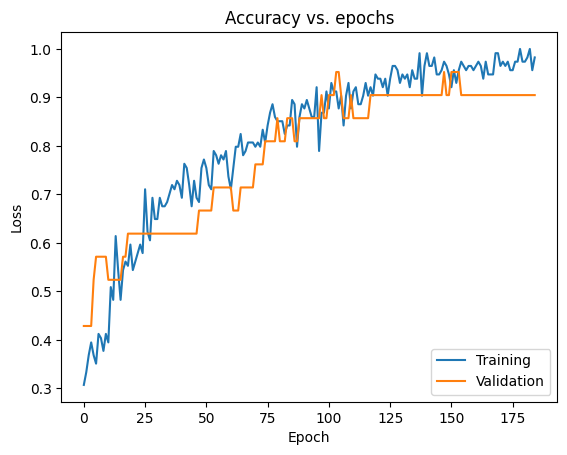

In [29]:

try:
    plt.plot(call_history.history['accuracy'])
    plt.plot(call_history.history['val_accuracy'])
except KeyError:
    plt.plot(call_history.history['acc'])
    plt.plot(call_history.history['val_acc'])
plt.title('Accuracy vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show() 

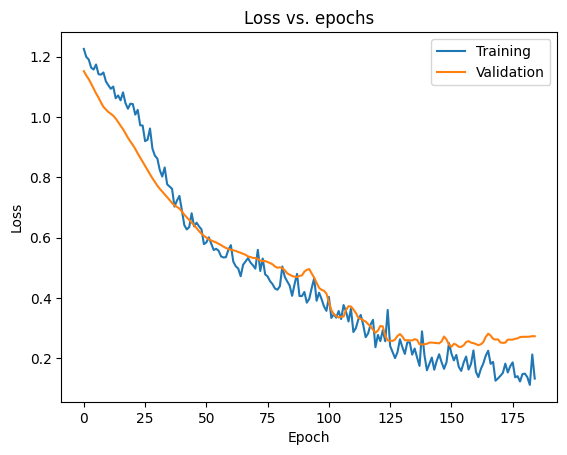

In [30]:
plt.plot(call_history.history['loss'])
plt.plot(call_history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show() 

In [31]:
test_loss, test_acc = history.evaluate(test_data, test_targets, verbose=0)
print("Test loss: {:.3f}\nTest accuracy: {:.2f}%".format(test_loss, 100 * test_acc))

Test loss: 0.223
Test accuracy: 93.33%


In [ ]:
model.save("iris_model.h5")